<a href="https://colab.research.google.com/github/zntbhctp/KalpHastaliklarinaYakalanmaRiskiTahminProjesi/blob/main/VIA_528E_Spring_2023_Chapter_3_Introduction_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split


data = load_diabetes()
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(353, 10)

In [ ]:

mdl =  keras.Sequential()

mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1],) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

## http://alexlenail.me/NN-SVG/index.html
mdl.compile(optimizer="adam", loss = "mse", metrics = ["mape"])

mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

3/3 [==============================] - 0s 4ms/step


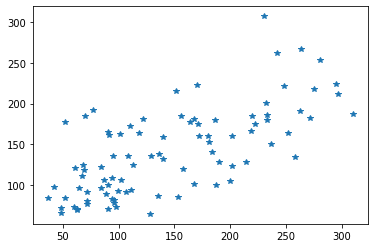

In [ ]:
ypred = mdl.predict(X_test)
plt.plot(y_test, ypred, "*")

In [ ]:
print(mdl.evaluate(X_train, y_train))
print(mdl.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 2652.8799 - mape: 34.5182
[2652.8798828125, 34.5181999206543]
3/3 [==============================] - 0s 4ms/step - loss: 2838.4915 - mape: 36.0433
[2838.491455078125, 36.04330062866211]


In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(455, 30)

In [ ]:
mdl =  keras.Sequential()

mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1],) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "sigmoid"))

mdl.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
print(mdl.evaluate(X_train, y_train))
print(mdl.evaluate(X_test, y_test))

15/15 [==============================] - 0s 2ms/step - loss: 2.1226e-04 - accuracy: 1.0000
[0.00021225929958745837, 1.0]
4/4 [==============================] - 0s 3ms/step - loss: 0.1443 - accuracy: 0.9737
[0.14431439340114594, 0.9736841917037964]


In [ ]:
ypred = mdl.predict(X_test)
ypred_label = (ypred >  0.5).astype("int")
ypred_label

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(120, 4)

In [ ]:
mdl =  keras.Sequential()

mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1],) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(3, activation = "softmax"))


mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
print(mdl.evaluate(X_train, y_train))
print(mdl.evaluate(X_test, y_test))

4/4 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 0.9917
[0.040713269263505936, 0.9916666746139526]
1/1 [==============================] - 0s 25ms/step - loss: 0.0125 - accuracy: 1.0000
[0.012524853460490704, 1.0]


In [ ]:
ypred =  mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis = 1)
ypred_label

1/1 [==============================] - 0s 79ms/step


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
ypred

array([[4.2369260e-04, 9.9646050e-01, 3.1157660e-03],
       [9.9829364e-01, 1.7063292e-03, 5.3265090e-08],
       [4.1922923e-11, 9.6480449e-07, 9.9999899e-01],
       [1.3870787e-03, 9.5179677e-01, 4.6816207e-02],
       [9.6391836e-05, 9.9437612e-01, 5.5274572e-03],
       [9.9802214e-01, 1.9776956e-03, 1.7669286e-07],
       [6.8767956e-03, 9.9246383e-01, 6.5933302e-04],
       [3.6561999e-06, 1.9658972e-03, 9.9803042e-01],
       [2.5190406e-05, 8.9025944e-01, 1.0971538e-01],
       [7.1667985e-04, 9.9882442e-01, 4.5883696e-04],
       [1.1639367e-04, 2.4126360e-02, 9.7575712e-01],
       [9.9962109e-01, 3.7883321e-04, 5.1785044e-08],
       [9.9913335e-01, 8.6666038e-04, 3.4653699e-08],
       [9.9959224e-01, 4.0763509e-04, 5.2110618e-08],
       [9.9987459e-01, 1.2550507e-04, 1.0861568e-08],
       [3.2730137e-03, 9.8019487e-01, 1.6532013e-02],
       [3.7551951e-07, 1.1707158e-04, 9.9988252e-01],
       [2.6727933e-04, 9.9943990e-01, 2.9290296e-04],
       [1.1220980e-03, 9.884